# **OBJETIVO**
##### Escolher quais itens levar para maximizar o valor total, sem ultrapassar o peso e o volume disponíveis.

# Bibliotecas

In [540]:
import pandas as pd
from geneticalgorithm import geneticalgorithm as ga

# Dados

In [541]:
dados= pd.read_csv("Itens.csv", sep=';')
dados.head()

,ID,PESO,VALOR,VOLUME
0,1,342,1136,32
1,2,305,5349,48
2,3,442,8487,26
3,4,944,4190,25
4,5,881,6644,47


# Resumo Dados

In [542]:
print(f'Quantidade de Itens: {len(dados)}')
print(f'Peso Total: {dados.PESO.sum()}')
print(f'Volume Total: {dados.VOLUME.sum()}')
print(f'Valor Total: {dados.VALOR.sum()}')

Quantidade de Itens: 20
Peso Total: 9205
Volume Total: 649
Valor Total: 115609


# Restrições

In [ ]:
sobra_peso = 6000
sobra_volume = 350
iteracao = 10

# Função de Avaliação/Ajuste

In [544]:
def avaliacao(x, dados, max_volume, max_peso):
    itens_selecionados = dados.iloc[x.astype(bool), :]
    total_peso = itens_selecionados.PESO.sum()
    total_volume = itens_selecionados.VOLUME.sum()

    if total_peso > max_peso or total_volume > max_volume:
        return -1
    else:
        return -itens_selecionados.VALOR.sum()

# Configuração do Algoritmo Genético

In [545]:
algorithm_param = {
    'max_num_iteration': iteracao,
    'population_size': 100,
    'mutation_probability': 0.1,
    'elit_ratio': 0.01,
    'crossover_probability': 0.5,
    'parents_portion': 0.3,
    'crossover_type': 'uniform',
    'max_iteration_without_improv': None
}

varbound = [[0, 1]] * len(dados)

# Modelo

In [546]:
model = ga(
    function=lambda x: avaliacao(x, dados, sobra_volume, sobra_peso),
    dimension=len(dados),
    variable_type='bool',
    variable_boundaries=varbound,
    algorithm_parameters=algorithm_param
)

# Execução

 The best solution found:                                                                           
 [0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0.]

 Objective function:
 -82582.0


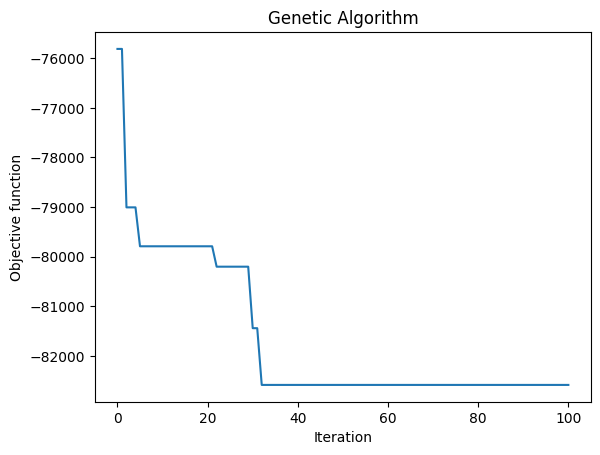

In [547]:
model.run()

# Solução

In [548]:
solucao = dados.iloc[model.output_dict['variable'].astype(bool), :]

# Resultados

In [549]:
print('\nResultados da Otimização')
print(solucao)
print(f'Quantidade Final: {len(solucao)}')
print(f'Peso Total: {solucao.PESO.sum()}')
print(f'Volume Final: {solucao.VOLUME.sum()}')
print(f'Valor Total: {solucao.VALOR.sum()}')


Resultados da Otimização
    ID  PESO  VALOR  VOLUME
2    3   442   8487      26
3    4   944   4190      25
6    7   315   6675      40
7    8   450   5529      27
8    9   111   5905      40
10  11   255   4307      16
11  12   515   8568      23
12  13   545   4498      24
13  14   909   8542      32
15  16   410   9620      16
17  18    57   6638      49
18  19   753   9623      20
Quantidade Final: 12
Peso Total: 5706
Volume Final: 338
Valor Total: 82582
